### Aplicación de PCA y K-MEANS al **CRISIS DE LA CORRUPCIÓN** optimizando el número de variables'per'

#### **Contexto**
La 
---


#### **Impacto en Programas de Gobierno**
1. **Salud Pública y Bienestar Social**:
   - Políticas para atender necesidades sociales críticas durante la pandemia.
   - Reducir desigua

#### **Variables 'per' elegidas para representar el efecto del DROGAS y CORRUPCIÓN en programas de gobierno**

- **per603**: 
  - Traditional Morality: Positive (Dominio: Fabric of Society)  
    <img src="../assets/per603_drogas.png" alt="Descripción per603" style="width:600px;">

- **per604**: 
  - Traditional Morality: Negative (Dominio: Fabric of Society)  
    <img src="../assets/per604_drogas.png" alt="Descripción per604" style="width:600px;">

- **per605**: 
  - Law and Order: Positive (Dominio: Fabric of Society)  
    <img src="../assets/per605_1_drogas.png" alt="Descripción per605_1" style="width:600px;">

- **per605**: 
  - Law and Order: Negative (Dominio: Fabric of Society)  
    <img src="../assets/per605_2_drogas.png" alt="Descripción per605_2" style="width:600px;">

- **per104**: 
  - Military: Positive (Dominio: External Relations)  
    <img src="../assets/per104_drogas.png" alt="Descripción per104" style="width:600px;">

- **per304**: 
  - Political Corrupcion (Dominio: Political System)  
    <img src="../assets/per304_drogas.png" alt="Descripción per304" style="width:600px;">
  

#### Cargamos librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


#### Cargamos la matriz de aspectos y la descripción de las variables 'per'

In [2]:
# Crear el DataFrame 'df_aspectos' con los aspectos y las variables asociadas
# 504, 503, 501, 404, 403, 405, 411, per107, per109, 303, 705, 706, 605, 606/
data_aspectos = {
    'aspecto': ['DROGAS_Y_CORRUPCIÓN'],
    'var_1': ['per603'],
    'var_2': ['per604'],
    'var_3': ['per605'],
    'var_4': ['per104'],
    'var_5': ['per304']
}
df_aspectos = pd.DataFrame(data_aspectos)
display(df_aspectos)
# cargar Analytical_Data
df_AD = pd.read_excel('data/Analytical_Data.xlsx')
display(df_AD.head())

,aspecto,var_1,var_2,var_3,var_4,var_5
0,DROGAS_Y_CORRUPCIÓN,per603,per604,per605,per104,per304


,Dominio,Nombre_Dominio,Variable_per,Detalle_Dominio
0,Domain_1,External Relations,per101,Foreign Special Relationships: Positive
1,Domain_1,External Relations,per102,Foreign Special Relationships: Negative
2,Domain_1,External Relations,per103,Anti-Imperialism
3,Domain_1,External Relations,per104,Military: Positive
4,Domain_1,External Relations,per105,Military: Negative


In [3]:
detalle_dominio_values = df_AD['Detalle_Dominio'].unique().tolist()
print(detalle_dominio_values)

['Foreign Special Relationships: Positive', 'Foreign Special Relationships: Negative', 'Anti-Imperialism', 'Military: Positive', 'Military: Negative', 'Peace', 'Internationalism: Positive', 'European Community/Union: Positive', 'Internationalism: Negative', 'European Community/Union: Negative', 'Freedom and Human Rights', 'Democracy', 'Constitutionalism: Positive', 'Constitutionalism: Negative', 'Decentralization', 'Centralisation', 'Governmental and Administrative Efficiency', 'Political Corruption', 'Political Authority', 'Free Market Economy', 'Incentives: Positive', 'Market Regulation', 'Economic Planning', 'Corporatism/Mixed Economy', 'Protectionism: Positive', 'Protectionism: Negative', 'Economic Goals', 'Keynesian Demand Management', 'Economic Growth: Positive', 'Technology and Infrastructure: Positive', 'Controlled Economy', 'Nationalisation', 'Economic Orthodoxy', 'Marxist Analysis', 'Anti-Growth Economy: Positive', 'Environmental Protection', 'Culture: Positive', 'Equality: P

#### Carga del dataset y definición del périodo en análisis ('desde' y 'hasta'), y el 'aspecto'

In [4]:
# Cargar el dataset principal
# Nota: 'MP_Dataset_KMeans_mean.xlsx' se genera desde el data set 'crudo' del Manifesto Project (notebook 'Correlaciones_General.ipynb', dataframe 'df_ponderado'),
# el cual ha sido ponderado por 'presvote' o 'pervote' y se le ha agregado la columna 'agno'
# Sólo se han eliminado columnas que NO son necesarias para K-MEANS (ventana_5, ventan_10, tipovoto)

file_path = './data/MP_Dataset_KMeans_mean.xlsx'
df = pd.read_excel(file_path)

# Filtrar el DataFrame según las variables del aspecto seleccionado y el período
aspecto_filtro = 'DROGAS_Y_CORRUPCIÓN'
desde = 2019
hasta = 2022

variables = df_aspectos[df_aspectos['aspecto'] == aspecto_filtro][['var_1', 'var_2', 'var_3', 'var_4', 'var_5']].dropna().values.flatten()

In [5]:
variables

array(['per603', 'per604', 'per605', 'per104', 'per304'], dtype=object)

In [6]:
df.columns

Index(['agno', 'countryname', 'per101', 'per102', 'per103', 'per104', 'per105',
       'per106', 'per107', 'per108',
       ...
       'per6013', 'per6014', 'per6061', 'per6071', 'per6072', 'per6081',
       'per7051', 'per7052', 'per7061', 'per7062'],
      dtype='object', length=112)

In [7]:
df

,agno,countryname,per101,per102,per103,per104,per105,per106,per107,per108,...,per6013,per6014,per6061,per6071,per6072,per6081,per7051,per7052,per7061,per7062
0,1997,Albania,1.770988,0.000000,0.031388,3.046506,0.015910,0.032313,3.406129,1.114989,...,2.021481,0.0,0.0,0.0,0.0,0.0,0.637892,0.363756,0.0,0.0
1,2001,Albania,2.392570,0.000000,0.000000,2.757403,0.026619,0.023948,3.523162,1.452779,...,0.989546,0.0,0.0,0.0,0.0,0.0,0.897238,0.508457,0.0,0.0
2,1989,Argentina,0.000000,0.000000,4.619213,0.448618,0.828036,0.338070,2.955090,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,1995,Argentina,0.061642,0.020140,0.143247,0.882433,0.083005,1.107286,1.996025,1.669947,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,1999,Argentina,0.192543,0.000000,0.582363,0.524400,0.017829,0.613450,3.482869,2.262154,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2008,United States,1.978711,0.088485,0.044020,5.839310,0.088485,1.308294,8.863648,0.343947,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
735,2012,United States,0.505120,0.161887,0.189797,7.527242,1.491961,0.658037,6.073936,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
736,2016,United States,0.866280,0.111349,0.000000,5.807609,0.763045,0.635581,4.669601,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
737,2020,United States,1.190682,0.129249,0.161450,5.565559,1.951804,0.480557,3.907785,0.020377,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


#### Para el período en análisis, si un país aparece más de una vez, se debe dejar sólo una vez, para lo cual se promediarán los valores de las variables 'per'

In [8]:
# Filtrar el dataframe por el período de análisis
df_periodo = df[(df['agno'] >= desde) & (df['agno'] <= hasta)]

# Identificar países con más de una elección en el período
duplicated_countries = df_periodo['countryname'].value_counts()
duplicated_countries = duplicated_countries[duplicated_countries > 1]

if not duplicated_countries.empty:
    print("\nPaíses con más de una elección en el período:")
    for country in duplicated_countries.index:
        print(f"\n{country}:")
        
        # Filtrar datos del país con duplicados
        country_data = df_periodo[df_periodo['countryname'] == country]
        
        # Imprimir los registros originales
        print(f"Registros originales ({len(country_data)}):")
        display(country_data)
        
        # Promediar las columnas `per` y conservar el primer año
        per_columns = [col for col in df_periodo.columns if col.startswith('per')]
        averaged_row = country_data[per_columns].mean().to_dict()
        averaged_row['agno'] = country_data['agno'].min()  # Primer año del período
        averaged_row['countryname'] = country
        
        # Imprimir los valores promedio
        print("\nValores promediados:")
        for key, value in averaged_row.items():
            if key in per_columns:  # Solo mostrar columnas 'per'
                print(f"{key}: {value:.4f}")
        
        # Eliminar los registros originales del dataframe filtrado
        df_periodo = df_periodo[df_periodo['countryname'] != country]
        
        # Agregar el registro promediado al dataframe
        df_periodo = pd.concat([df_periodo, pd.DataFrame([averaged_row])], ignore_index=True)

else:
    print("\nNo hay países con más de una elección en el período.")

# Verificar los resultados finales
print("\nDataframe ajustado (un registro por país en el período):")
display(df_periodo)



Países con más de una elección en el período:

Australia:
Registros originales (2):


,agno,countryname,per101,per102,per103,per104,per105,per106,per107,per108,...,per6013,per6014,per6061,per6071,per6072,per6081,per7051,per7052,per7061,per7062
47,2019,Australia,0.567388,0.012864,0.000000,2.524464,0.154969,0.09146,0.434446,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,2022,Australia,0.851622,0.019521,0.148398,5.672560,0.205239,0.04450,1.388719,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Valores promediados:
per101: 0.7095
per102: 0.0162
per103: 0.0742
per104: 4.0985
per105: 0.1801
per106: 0.0680
per107: 0.9116
per108: 0.0000
per109: 0.0159
per110: 0.0027
per201: 0.8789
per202: 0.9557
per203: 0.0073
per204: 0.0320
per301: 0.7172
per302: 0.0251
per303: 0.7920
per304: 1.7457
per305: 2.0283
per401: 0.7749
per402: 4.4410
per403: 6.4476
per404: 0.2208
per405: 0.2484
per406: 0.2643
per407: 0.1670
per408: 0.0834
per409: 1.3267
per410: 3.2331
per411: 11.0310
per412: 0.5768
per413: 0.3024
per414: 0.3670
per415: 0.0000
per416: 3.1695
per501: 5.9203
per502: 1.6639
per503: 5.8581
per504: 12.9984
per505: 0.0419
per506: 2.5120
per507: 0.0000
per601: 0.9467
per602: 0.7725
per603: 0.2139
per604: 0.0719
per605: 3.7608
per606: 0.4210
per607: 3.4459
per608: 0.0133
per701: 5.6262
per702: 0.2350
per703: 8.3330
per704: 0.0550
per705: 0.0541
per706: 0.8946
per1011: 0.0000
per1012: 0.0000
per1013: 0.0000
per1014: 0.0000
per1015: 0.0000
per1016: 0.0000
per1021: 0.0000
per1022: 0.0000
per1023:

,agno,countryname,per101,per102,per103,per104,per105,per106,per107,per108,...,per6013,per6014,per6061,per6071,per6072,per6081,per7051,per7052,per7061,per7062
0,2019,Argentina,0.000000,0.000000,1.478898,1.518659,0.113644,0.594088,3.418984,0.688078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,Armenia,1.877354,0.369588,0.000000,6.930662,0.000000,0.133881,2.303442,0.384132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019,Austria,0.000000,0.000000,0.000000,1.300189,0.114756,0.201104,2.206878,2.089282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019,Belgium,0.062118,0.000000,0.087621,1.067569,0.258610,0.136532,1.898790,1.352571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022,Brazil,0.000000,0.000000,0.463649,0.690862,0.000000,0.163617,1.961420,0.375121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2019,Canada,0.035967,0.192398,0.000000,2.040502,0.072144,0.405559,1.711922,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2021,Chile,0.038239,0.015586,0.059179,0.688266,0.217654,0.086899,0.766963,0.170824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2019,Denmark,0.000000,0.000000,0.145950,1.030195,0.173018,0.078527,3.820138,2.600006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2019,Estonia,0.018787,0.243498,0.036218,8.179130,0.000000,0.115294,1.446012,1.378032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2019,Finland,0.303665,0.000000,0.000000,1.816082,0.301268,0.207669,2.111900,0.958192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Análisis exploratorio sobre las variables seleccionadas

Estadísticas descriptivas de las variables seleccionadas:


,count,mean,std,min,25%,50%,75%,max
per603,29.0,0.750417,0.830891,0.000000,0.261078,0.351969,1.080588,4.272292
per604,29.0,0.321801,0.359930,0.000000,0.011962,0.220745,0.623190,1.159471
per605,29.0,4.147794,2.526812,0.472313,2.770949,3.643224,5.129255,14.205347
per104,29.0,2.279882,2.113613,0.000000,0.828467,1.479821,3.537355,8.179130
per304,29.0,1.777554,2.318992,0.047998,0.602190,0.887012,1.908874,11.274283


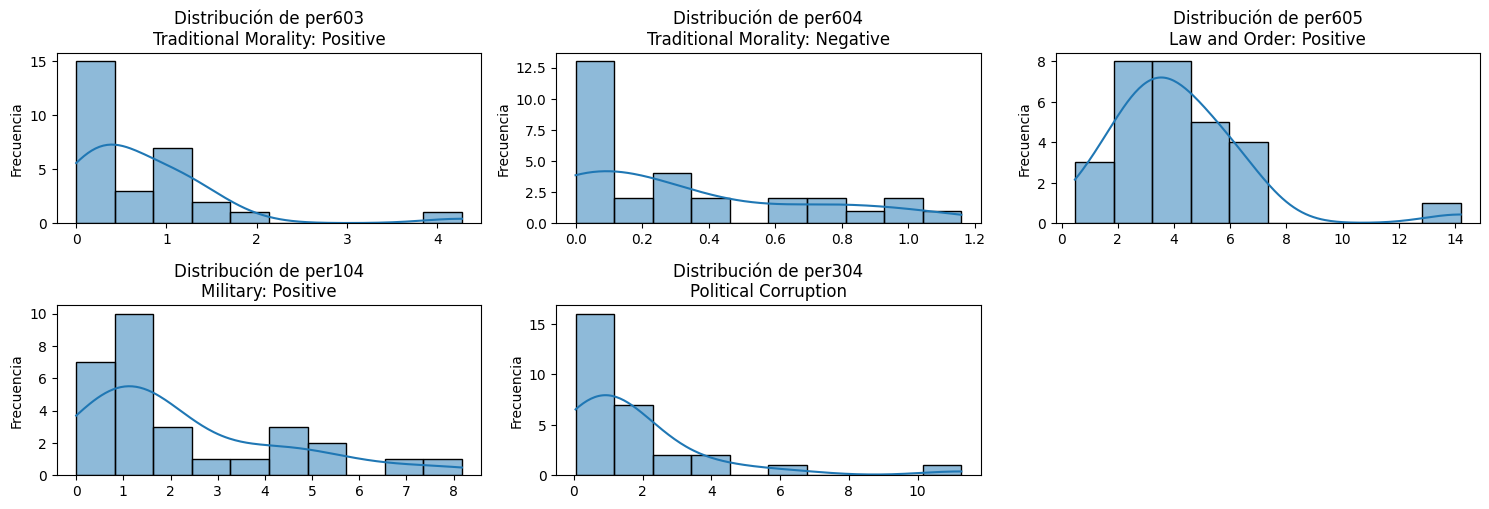

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables 'per' seleccionadas al inicio
selected_variables = variables

# Filtrar el dataframe para estas variables
df_selected = df_periodo[selected_variables]

# Crear un diccionario para mapear cada variable con su detalle desde 'df_AD'
variable_details = df_AD.set_index('Variable_per')['Detalle_Dominio'].to_dict()

# Estadísticas descriptivas
print("Estadísticas descriptivas de las variables seleccionadas:")
display(df_selected.describe().T)

# Visualizar histogramas
plt.figure(figsize=(15, 10))
for i, var in enumerate(selected_variables):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df_selected[var], kde=True, bins=10)
    # Título con el detalle de la variable
    detail = variable_details.get(var, "Detalle no disponible")
    plt.title(f'Distribución de {var}\n{detail}')
    plt.xlabel('')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


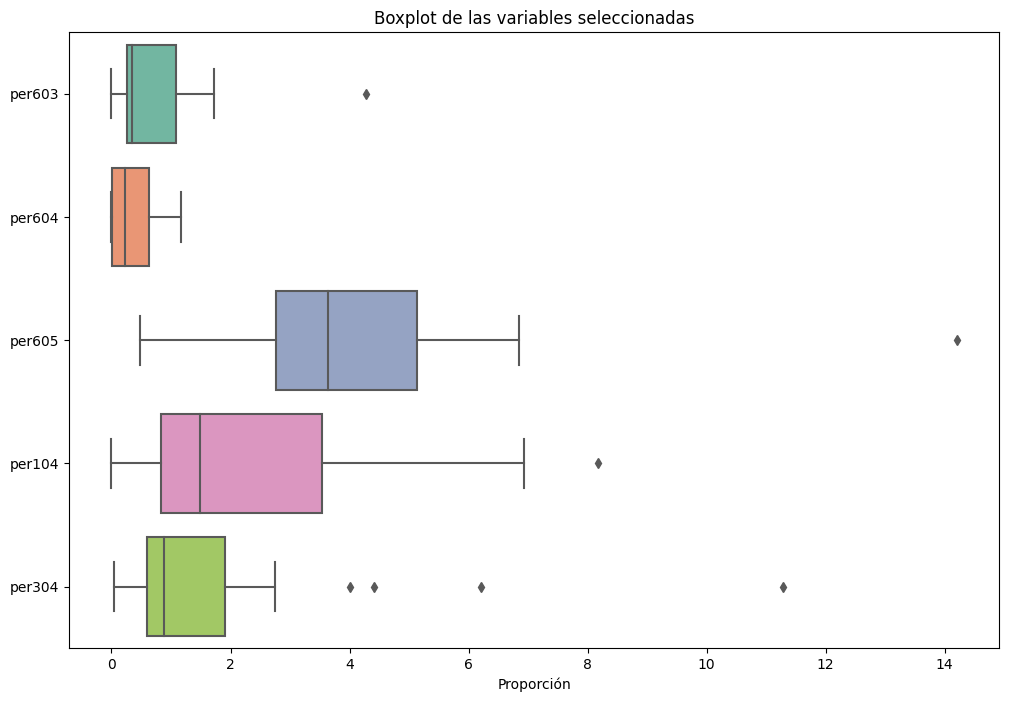

In [10]:
# Boxplots para visualizar outliers y la dispersión de cada variable
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_selected, orient="h", palette="Set2")
plt.title("Boxplot de las variables seleccionadas")
plt.xlabel("Proporción")
plt.show()


In [11]:
if not isinstance(selected_variables, list):
    selected_variables = list(selected_variables)
df_selected = df_periodo[['countryname', 'agno'] + selected_variables].copy()


In [12]:
df_selected

,countryname,agno,per603,per604,per605,per104,per304
0,Argentina,2019,0.079588,0.000000,3.375097,1.518659,6.209123
1,Armenia,2021,0.274811,0.011962,1.217145,6.930662,1.579065
2,Austria,2019,0.934710,0.291487,6.838773,1.300189,1.514087
3,Belgium,2019,0.351969,0.988327,5.740911,1.067569,0.269786
4,Brazil,2022,1.214040,0.000000,4.414072,0.690862,2.595333
5,Canada,2019,0.343793,0.376332,6.179909,2.040502,1.058023
6,Chile,2021,0.897261,1.159471,4.817641,0.688266,0.654755
7,Denmark,2019,0.261078,0.623190,3.643224,1.030195,0.047998
8,Estonia,2019,1.227046,0.075482,3.197075,8.179130,0.231651
9,Finland,2019,1.104007,0.271604,2.096413,1.816082,0.131395


#### Análisis de outliers

In [13]:
# Asegurar que `df_selected` incluye 'countryname' y 'agno'
df_selected = df_periodo[['countryname', 'agno'] + selected_variables].copy()

# Crear un diccionario para obtener los detalles de las variables 'per' desde 'df_AD'
variable_details = df_AD.set_index('Variable_per')['Detalle_Dominio'].to_dict()

# Identificar valores extremos usando el rango intercuartílico (IQR)
for var in selected_variables:
    Q1 = df_selected[var].quantile(0.25)  # Primer cuartil
    Q3 = df_selected[var].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    
    # Filtrar outliers
    outliers = df_selected[(df_selected[var] < (Q1 - 1.5 * IQR)) | (df_selected[var] > (Q3 + 1.5 * IQR))]
    
    # Mostrar resultados
    print(f"\nVariable: {var}")
    print(f"Descripción: {variable_details.get(var, 'Descripción no disponible')}")
    print(f"Número de outliers: {len(outliers)}")
    
    if not outliers.empty:
        print("Países outliers:")
        countries_outliers = outliers['countryname'].unique()
        print(", ".join(countries_outliers))
        
        # Mostrar detalle de los registros outliers
        display(outliers[['countryname', 'agno', var]])



Variable: per603
Descripción: Traditional Morality: Positive
Número de outliers: 1
Países outliers:
United States


,countryname,agno,per603
27,United States,2020,4.272292



Variable: per604
Descripción: Traditional Morality: Negative
Número de outliers: 0

Variable: per605
Descripción: Law and Order: Positive
Número de outliers: 1
Países outliers:
Sweden


,countryname,agno,per605
24,Sweden,2022,14.205347



Variable: per104
Descripción: Military: Positive
Número de outliers: 1
Países outliers:
Estonia


,countryname,agno,per104
8,Estonia,2019,8.17913



Variable: per304
Descripción: Political Corruption
Número de outliers: 4
Países outliers:
Argentina, Moldova, South Africa, Ukraine


,countryname,agno,per304
0,Argentina,2019,6.209123
15,Moldova,2019,3.999560
21,South Africa,2019,4.418010
25,Ukraine,2019,11.274283


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_6169/900797471.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_selected[var], shade=True)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_6169/900797471.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_selected[var], shade=True)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_6169/900797471.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_selected[var], shade=True)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_6169/900797471.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=Tru

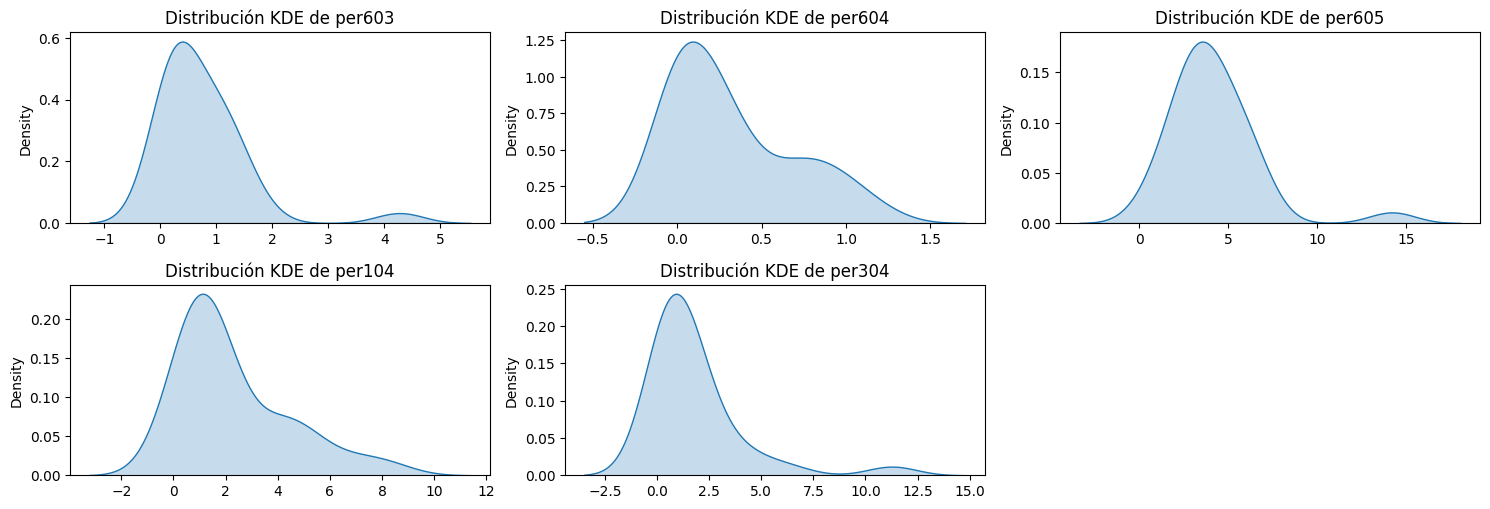

In [14]:
# Visualización KDE
plt.figure(figsize=(15, 10))
for i, var in enumerate(selected_variables):
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(df_selected[var], shade=True)
    plt.title(f'Distribución KDE de {var}')
    plt.xlabel('')
plt.tight_layout()
plt.show()


#### Análisis de correlaciones

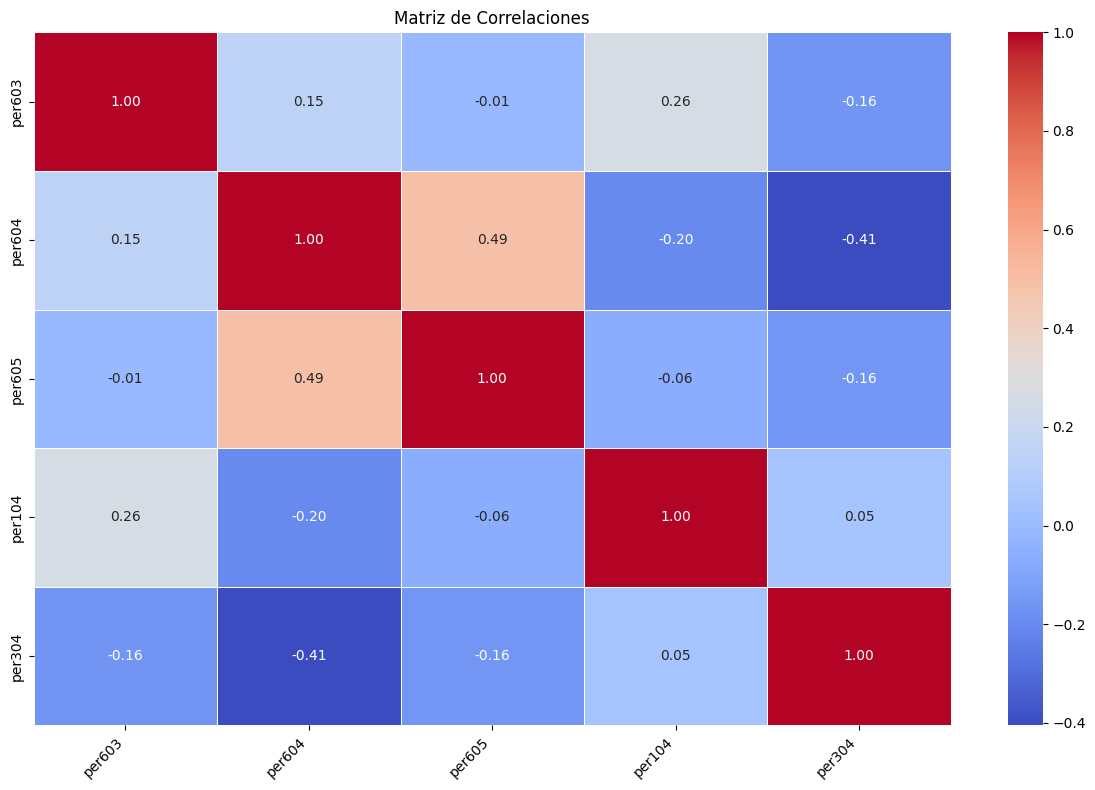

No hay variables con correlación mayor al umbral establecido.


In [15]:
# Seleccionar solo las columnas numéricas para el cálculo de correlaciones
df_selected_numeric = df_selected[selected_variables]

# Calcular la matriz de correlaciones
correlation_matrix = df_selected_numeric.corr()

# Visualizar la matriz de correlaciones como un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identificar pares de variables altamente correlacionadas (umbral > 0.8)
threshold = 0.8
high_corr_pairs = correlation_matrix.where(
    (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)
).stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']

if not high_corr_pairs.empty:
    print("Pares de variables altamente correlacionadas:")
    display(high_corr_pairs)
else:
    print("No hay variables con correlación mayor al umbral establecido.")


#### 1.Filtrar y Normalizar datos

In [16]:
# Filtrar el DataFrame 'df_periodo' para las variables del aspecto
df_filtered = df_periodo[['countryname', 'agno'] + list(variables)].copy()
df_filtered.dropna(inplace=True)

# Normalizar las columnas per
columns_per = variables
df_filtered['per_sum'] = df_filtered[columns_per].sum(axis=1)
rows_to_normalize = df_filtered['per_sum'] != 1.0
df_filtered.loc[rows_to_normalize, columns_per] = df_filtered.loc[rows_to_normalize, columns_per].div(
    df_filtered.loc[rows_to_normalize, 'per_sum'], axis=0
)
df_filtered.drop(columns=['per_sum'], inplace=True)

# Verificar que las variables per sumen 1
assert df_filtered[columns_per].sum(axis=1).round(6).eq(1).all(), "Error: las variables per no suman 1."

# Mostrar el DataFrame filtrado y normalizado
print("\nDataFrame filtrado y normalizado:")
display(df_filtered)



DataFrame filtrado y normalizado:


,countryname,agno,per603,per604,per605,per104,per304
0,Argentina,2019,0.007117,0.000000,0.301820,0.135807,0.555255
1,Armenia,2021,0.027444,0.001195,0.121549,0.692122,0.157691
2,Austria,2019,0.085917,0.026793,0.628607,0.119511,0.139172
3,Belgium,2019,0.041809,0.117399,0.681935,0.126811,0.032047
4,Brazil,2022,0.136190,0.000000,0.495167,0.077500,0.291142
5,Canada,2019,0.034384,0.037639,0.618080,0.204080,0.105818
6,Chile,2021,0.109190,0.141100,0.586274,0.083757,0.079679
7,Denmark,2019,0.046574,0.111171,0.649916,0.183777,0.008562
8,Estonia,2019,0.095043,0.005847,0.247636,0.633531,0.017943
9,Finland,2019,0.203710,0.050116,0.386828,0.335101,0.024245


#### 2.Realizar PCA

In [33]:
# Seleccionar sólo las columnas numéricas (per) para PCA
numeric_data = df_filtered[columns_per]

# Ejecutar PCA
pca = PCA(n_components=3)
pca_components = pca.fit_transform(numeric_data)

# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])

# Combinar con las columnas categóricas
df_pca = pd.concat([df_filtered[['countryname', 'agno']].reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

# Verificar el resultado
print(df_pca.info())
print(df_pca.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   countryname  29 non-null     object 
 1   agno         29 non-null     int64  
 2   PC1          29 non-null     float64
 3   PC2          29 non-null     float64
 4   PC3          29 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB
None
  countryname  agno       PC1       PC2       PC3
0   Argentina  2019  0.112353  0.405201 -0.050587
1     Armenia  2021  0.545941 -0.152773 -0.082677
2     Austria  2019 -0.205161 -0.022277 -0.007639
3     Belgium  2019 -0.265554 -0.131138 -0.033060
4      Brazil  2022 -0.107596  0.154530  0.062273
5      Canada  2019 -0.149078 -0.084471 -0.068276
6       Chile  2021 -0.217399 -0.055499  0.065442
7     Denmark  2019 -0.207856 -0.170373 -0.033562
8     Estonia  2019  0.393520 -0.278098 -0.021754
9     Finland  2019  0.094418 -0.1760

#### Optimización del PCA: analizamos los abs(loadings) y nos quedamos con las variables que contribuyen más que el umbral

In [36]:
# Umbral de contribución mínimo
threshold = 0.2

# Calcular las cargas (loading scores) del PCA
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=columns_per
)

# Evaluar contribución de cada variable
variable_importance = loadings.abs().max(axis=1)  # Máximo valor absoluto por variable
selected_variables = variable_importance[variable_importance > threshold].index.tolist()

# Mostrar las variables seleccionadas y eliminadas
print("Variables seleccionadas:", selected_variables)
print("Variables eliminadas:", set(columns_per) - set(selected_variables))



Variables seleccionadas: ['per603', 'per605', 'per104', 'per304']
Variables eliminadas: {'per604'}


#### Optimización

In [38]:
# Filtrar el dataframe para las variables seleccionadas
numeric_data_optimized = df_filtered[selected_variables]

# Recalcular PCA con las variables seleccionadas
pca_optimized = PCA(n_components=min(len(selected_variables), 3))  # Recalcular PCA
pca_optimized.fit(numeric_data_optimized)

# Calcular la varianza explicada acumulada
explained_variance_optimized = np.cumsum(pca_optimized.explained_variance_ratio_)
print(f"Varianza explicada acumulada con variables seleccionadas: {explained_variance_optimized[-1]:.2%}")

# Crear un nuevo DataFrame con las componentes principales
pca_components_optimized = pca_optimized.transform(numeric_data_optimized)
df_pca_optimized = pd.DataFrame(
    pca_components_optimized,
    columns=[f'PC{i+1}' for i in range(pca_optimized.n_components)]
)
df_pca_optimized = pd.concat([df_filtered[['countryname', 'agno']].reset_index(drop=True), df_pca_optimized], axis=1)


Varianza explicada acumulada con variables seleccionadas: 99.73%


#### Optimizada

In [39]:
# Crear un diccionario para actualizar 'optimized_aspectos'
optimized_aspectos_data = {
    'aspecto': [aspecto_filtro],  # Añadir el aspecto actual
}

# Añadir las variables seleccionadas al diccionario
if selected_variables:  # Validar que no esté vacío
    for i, variable in enumerate(selected_variables, start=1):
        optimized_aspectos_data[f'var_{i}'] = [variable]

# Crear el DataFrame actualizado
df_aspectos_optimized = pd.DataFrame(optimized_aspectos_data)

# Validar el resultado
print(f"Aspecto seleccionado: {aspecto_filtro}")
print(f"Variables seleccionadas: {selected_variables}")
display(df_aspectos_optimized)


Aspecto seleccionado: DROGAS_Y_CORRUPCIÓN
Variables seleccionadas: ['per603', 'per605', 'per104', 'per304']


,aspecto,var_1,var_2,var_3,var_4
0,DROGAS_Y_CORRUPCIÓN,per603,per605,per104,per304


#### Varianza explicada por cada componente de PCA

In [40]:
# Calcular la varianza explicada acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Mostrar el porcentaje de varianza acumulada con las componentes disponibles
print(f"La varianza acumulada con las componentes principales disponibles es: {cumulative_variance[-1]:.4f} ({cumulative_variance[-1] * 100:.2f}%)")

# Validar si es posible alcanzar el 90% de varianza explicada
if cumulative_variance[-1] < 0.90:
    print("No es posible explicar el 90% de la varianza con las componentes disponibles.")
    optimal_components = len(cumulative_variance)  # Todas las componentes disponibles
else:
    optimal_components = np.argmax(cumulative_variance >= 0.90) + 1
    print(f"El número mínimo de componentes para explicar el 90% de la varianza es: {optimal_components}")


La varianza acumulada con las componentes principales disponibles es: 0.9869 (98.69%)
El número mínimo de componentes para explicar el 90% de la varianza es: 2


#### Optimizada

In [41]:
# Calcular la varianza explicada acumulada para el PCA recalculado
cumulative_variance_optimized = np.cumsum(pca_optimized.explained_variance_ratio_)

# Mostrar el porcentaje de varianza acumulada con las componentes disponibles
print(f"La varianza acumulada con las nuevas variables seleccionadas: {cumulative_variance_optimized[-1]:.4f} ({cumulative_variance_optimized[-1] * 100:.2f}%)")

# Validar si es posible alcanzar el 90% de varianza explicada
if cumulative_variance_optimized[-1] < 0.90:
    print("No es posible explicar el 90% de la varianza con las componentes disponibles.")
    optimal_components_optimized = len(cumulative_variance_optimized)  # Todas las componentes disponibles
else:
    optimal_components_optimized = np.argmax(cumulative_variance_optimized >= 0.90) + 1
    print(f"El número mínimo de componentes para explicar el 90% de la varianza es: {optimal_components_optimized}")


La varianza acumulada con las nuevas variables seleccionadas: 0.9973 (99.73%)
El número mínimo de componentes para explicar el 90% de la varianza es: 2


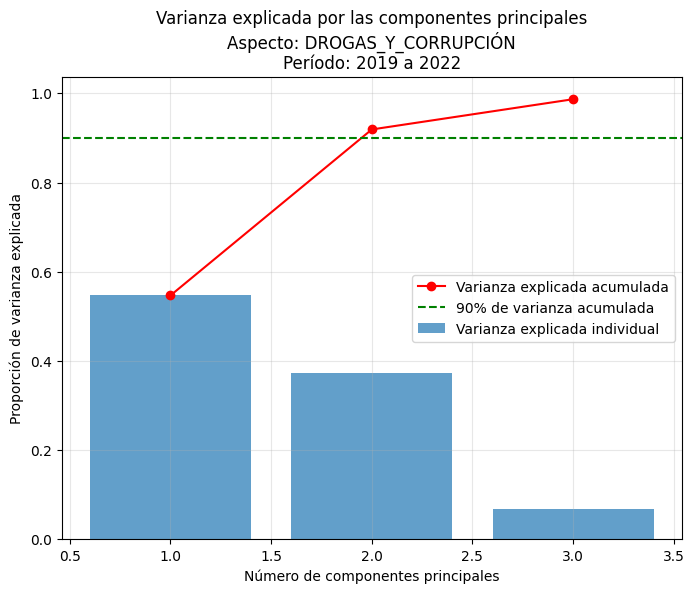

Componente 1: 0.5468 (0.5468 acumulado)
Componente 2: 0.3723 (0.9190 acumulado)
Componente 3: 0.0678 (0.9869 acumulado)
La varianza acumulada con las componentes principales disponibles es: 0.9869 (98.69%)


In [42]:
# Varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Varianza acumulada
explained_variance_cumulative = np.cumsum(explained_variance_ratio)

# Visualización de la varianza explicada
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Varianza explicada individual')
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o', color='red', label='Varianza explicada acumulada')
plt.title(f"Varianza explicada por las componentes principales\nAspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.axhline(y=0.9, color='green', linestyle='--', label='90% de varianza acumulada')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Imprimir la varianza explicada
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Componente {i}: {ratio:.4f} ({explained_variance_cumulative[i-1]:.4f} acumulado)")
# Mostrar el porcentaje de varianza acumulada con las componentes disponibles
print(f"La varianza acumulada con las componentes principales disponibles es: {cumulative_variance[-1]:.4f} ({cumulative_variance[-1] * 100:.2f}%)")


#### Optimizada

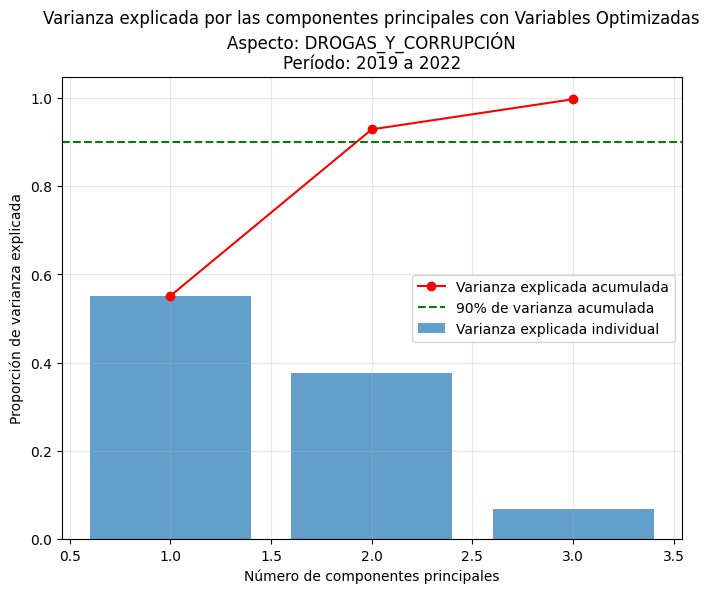

Varianza explicada por cada componente principal:
Componente 1: 0.5517 (0.5517 acumulado)
Componente 2: 0.3772 (0.9290 acumulado)
Componente 3: 0.0683 (0.9973 acumulado)

La varianza acumulada con las componentes principales disponibles es: 0.9973 (99.73%)


In [43]:
# Varianza explicada por cada componente principal para el PCA optimizado
explained_variance_ratio_optimized = pca_optimized.explained_variance_ratio_

# Varianza acumulada
explained_variance_cumulative_optimized = np.cumsum(explained_variance_ratio_optimized)

# Visualización de la varianza explicada
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio_optimized) + 1), explained_variance_ratio_optimized, alpha=0.7, label='Varianza explicada individual')
plt.plot(range(1, len(explained_variance_cumulative_optimized) + 1), explained_variance_cumulative_optimized, marker='o', color='red', label='Varianza explicada acumulada')
plt.title(f"Varianza explicada por las componentes principales con Variables Optimizadas\nAspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.axhline(y=0.9, color='green', linestyle='--', label='90% de varianza acumulada')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, ratio in enumerate(explained_variance_ratio_optimized, start=1):
    print(f"Componente {i}: {ratio:.4f} ({explained_variance_cumulative_optimized[i-1]:.4f} acumulado)")

# Mostrar el porcentaje de varianza acumulada con las componentes disponibles
print(f"\nLa varianza acumulada con las componentes principales disponibles es: {explained_variance_cumulative_optimized[-1]:.4f} ({explained_variance_cumulative_optimized[-1] * 100:.2f}%)")


In [44]:
# Calcular las cargas de las variables originales en las componentes principales
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=columns_per
)
# Mostrar las cargas
print("\n***** LOADINGS *****")
display(loadings)



***** LOADINGS *****


,PC1,PC2,PC3
per603,0.013681,-0.079002,0.824306
per604,-0.094015,-0.066600,0.113039
per605,-0.732877,-0.230126,-0.365656
per104,0.654809,-0.470079,-0.358726
per304,0.158401,0.845808,-0.212963


#### Optimizado

In [45]:
# Calcular las cargas de las variables originales en las componentes principales optimizadas
loadings_optimized = pd.DataFrame(
    pca_optimized.components_.T,  # Usar el modelo pca_optimized
    columns=[f'PC{i+1}' for i in range(pca_optimized.n_components_)],
    index=selected_variables  # Usar las variables seleccionadas tras la optimización
)

# Mostrar las cargas
print("\n***** LOADINGS OPTIMIZADOS *****")
display(loadings_optimized)



***** LOADINGS OPTIMIZADOS *****


,PC1,PC2,PC3
per603,0.015338,-0.078234,0.835391
per605,-0.733892,-0.246017,-0.352124
per104,0.662950,-0.459242,-0.360350
per304,0.147187,0.849972,-0.219725


#### Loading Scores
* Usamos los loading scores (cargas) obtenidos del PCA para medir cuánto contribuye cada variable a las componentes principales.
* Si una variable tiene consistentemente valores bajos (en valor absoluto) en todas las componentes principales seleccionadas, su impacto es mínimo y podría eliminarse.

#### Optimizada

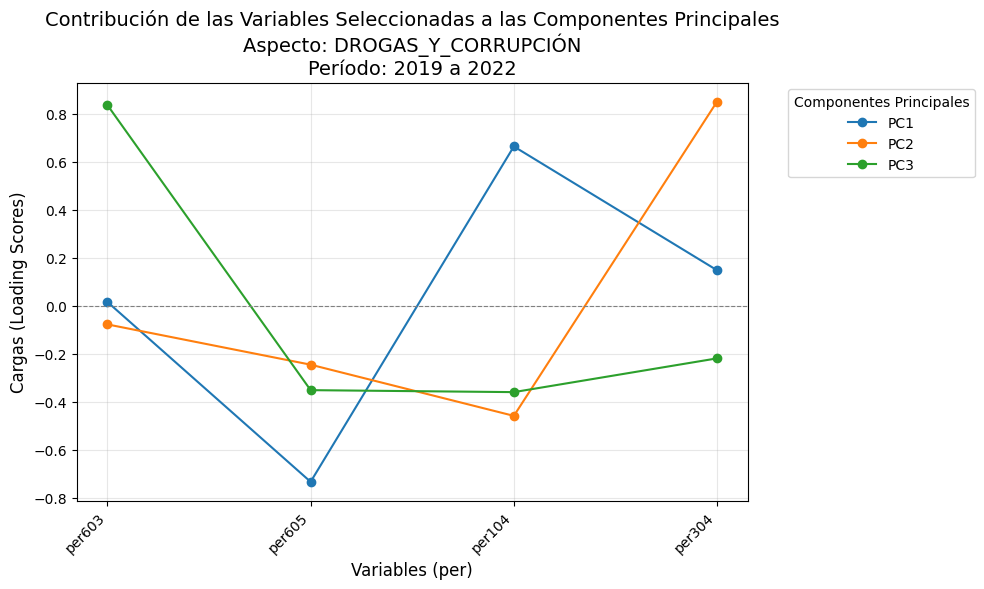

In [46]:
# Graficar las cargas (loading scores) para las variables optimizadas
plt.figure(figsize=(10, 6))
for i, col in enumerate(loadings_optimized.columns):
    plt.plot(
        loadings_optimized.index,  # Variables 'per' seleccionadas
        loadings_optimized[col], 
        marker='o', 
        label=col
    )

# Configuración del gráfico
plt.title(f"Contribución de las Variables Seleccionadas a las Componentes Principales\nAspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}", fontsize=14)
plt.xlabel('Variables (per)', fontsize=12)
plt.ylabel('Cargas (Loading Scores)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend(title='Componentes Principales', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [47]:
# Mostrar los loading scores como una tabla
print("Loading Scores (Contribución de cada variable a las componentes principales):")
display(loadings_optimized.round(4))  # Limitar a 4 decimales para mayor claridad

Loading Scores (Contribución de cada variable a las componentes principales):


,PC1,PC2,PC3
per603,0.0153,-0.0782,0.8354
per605,-0.7339,-0.2460,-0.3521
per104,0.6630,-0.4592,-0.3603
per304,0.1472,0.8500,-0.2197


#### 3.Elbow + K-MEANS
* Con K-MEANS vemos si es que los componentes principales forman clusteres
* Para saber el número óptimo de clusteres en un método de clasificación como K_MEANS, usamos el "elbow method". Este método:
* * Calcula los WCSS (Within-Cluster Sum of Squares): Mide la suma de las distancias cuadradas entre los puntos de datos y el centroide de su clúster.
* * Se calcula WCSS para diferentes números de clústeres (kk)
* * Al graficar kk contra WCSS, la curva normalmente muestra una pendiente pronunciada que luego se estabiliza.
* * El "codo" es el punto donde la reducción en WCSS deja de ser significativa, indicando que agregar más clústeres no mejora sustancialmente la compactación

#### Optimizada

/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/

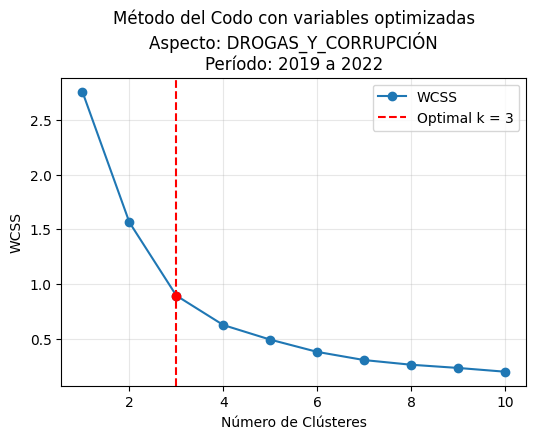

El número óptimo de clústeres (método del codo) es: 3


In [48]:
from kneed import KneeLocator

# Usar los datos normalizados de las variables optimizadas
data_scaled_optimized = numeric_data_optimized  # Datos numéricos normalizados seleccionados

# Calcular WCSS para determinar el número óptimo de clústeres
max_k = 10
wcss = []
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_optimized)
    wcss.append(kmeans.inertia_)

# Encontrar el codo automáticamente
kl = KneeLocator(range(1, max_k + 1), wcss, curve="convex", direction="decreasing")
optimal_k = kl.knee

# Graficar el método del codo
plt.figure(figsize=(6, 4))
plt.plot(range(1, max_k + 1), wcss, marker='o', label="WCSS")
if optimal_k is not None:
    plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
    plt.scatter(optimal_k, wcss[optimal_k - 1], color='red', zorder=5)  # Punto del codo
plt.title(f"Método del Codo con variables optimizadas\nAspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Validación del número de clústeres óptimo
if optimal_k is not None:
    print(f"El número óptimo de clústeres (método del codo) es: {optimal_k}")
else:
    print("No se identificó un codo claro. Considera ajustar el rango de k o analizar los WCSS.")


#### Optimizada

/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


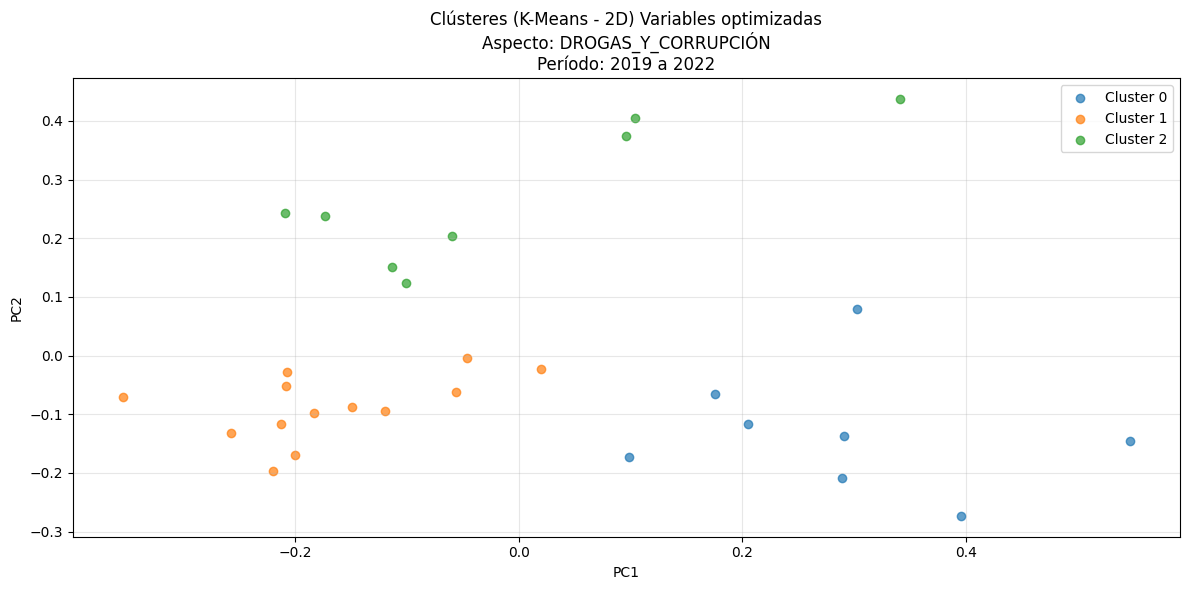

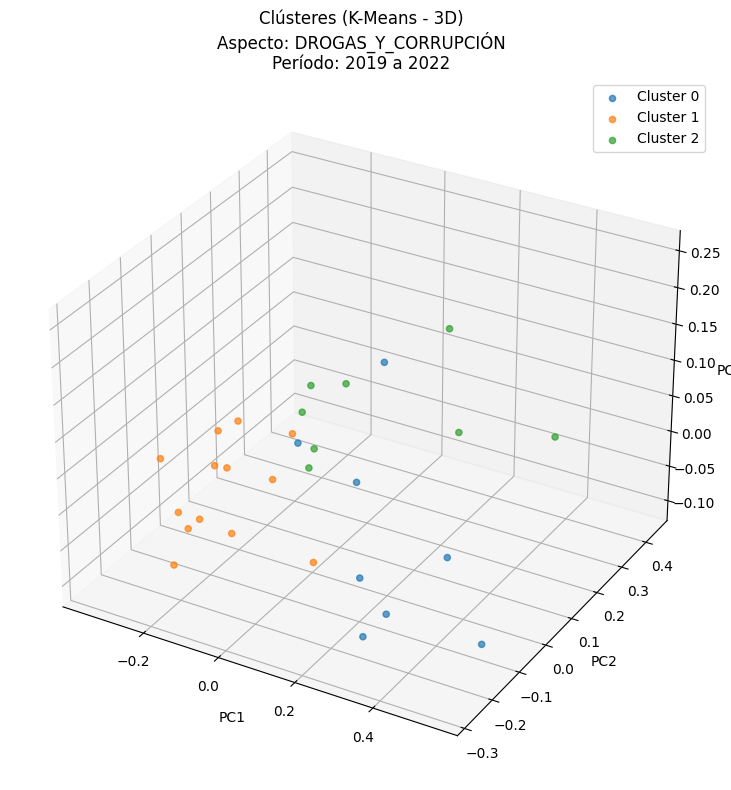

In [50]:
from mpl_toolkits.mplot3d import Axes3D

# Aplicar K-Means con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_pca_optimized['cluster'] = kmeans.fit_predict(df_pca_optimized[['PC1', 'PC2', 'PC3']])

# Visualizar clústeres en 2D
plt.figure(figsize=(12, 6))
for cluster in range(optimal_k):
    cluster_data = df_pca_optimized[df_pca_optimized['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title(f"Clústeres (K-Means - 2D) Variables optimizadas\nAspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Visualizar clústeres en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(optimal_k):
    cluster_data = df_pca_optimized[df_pca_optimized['cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster}', alpha=0.7)

ax.set_title(f"Clústeres (K-Means - 3D)\nAspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.tight_layout()
plt.show()


#### 4.Visualicemos qué países-programas hay en cada cluster

#### Clusters y países

In [51]:
# Explorar los países y períodos en cada clúster
for cluster in range(optimal_k):
    cluster_data = df_pca_optimized[df_pca_optimized['cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Total Programas: {len(cluster_data)}")

    # Obtener la lista de países únicos en el clúster
    unique_countries = cluster_data['countryname'].unique()
    print(f"Países en el clúster: [{', '.join(unique_countries)}]")

    # Mostrar los datos relevantes del clúster
    display(cluster_data[['countryname', 'agno', 'PC1', 'PC2', 'PC3']])




Cluster 0:
Total Programas: 8
Países en el clúster: [Armenia, Estonia, Finland, Georgia, Iceland, Lithuania, United States, Australia]


,countryname,agno,PC1,PC2,PC3
1,Armenia,2021,0.546667,-0.145108,-0.084146
8,Estonia,2019,0.395758,-0.273291,-0.020253
9,Finland,2019,0.098356,-0.173628,0.127668
10,Georgia,2020,0.289675,-0.209130,-0.093582
13,Iceland,2021,0.302572,0.078536,-0.086089
14,Lithuania,2020,0.205642,-0.116426,0.071821
27,United States,2020,0.291360,-0.137442,0.251253
28,Australia,2019,0.175371,-0.064758,-0.084135



Cluster 1:
Total Programas: 13
Países en el clúster: [Austria, Belgium, Canada, Chile, Denmark, Germany, Netherlands, New Zealand, Portugal, South Korea, Spain, Sweden, United Kingdom]


,countryname,agno,PC1,PC2,PC3
2,Austria,2019,-0.206901,-0.027201,-0.003436
3,Belgium,2019,-0.257641,-0.131276,-0.038154
5,Canada,2019,-0.148810,-0.087768,-0.065925
6,Chile,2021,-0.207935,-0.052755,0.056869
7,Denmark,2019,-0.199761,-0.169894,-0.038266
11,Germany,2021,-0.119429,-0.095355,0.098025
17,Netherlands,2021,-0.182683,-0.098094,0.027675
18,New Zealand,2020,-0.353689,-0.070631,0.001541
20,Portugal,2019,-0.056240,-0.061823,0.015660
22,South Korea,2020,0.020160,-0.022281,-0.103119



Cluster 2:
Total Programas: 8
Países en el clúster: [Argentina, Brazil, Greece, Moldova, Montenegro, Panama, South Africa, Ukraine]


,countryname,agno,PC1,PC2,PC3
0,Argentina,2019,0.103763,0.405534,-0.051492
4,Brazil,2022,-0.113682,0.150158,0.067296
12,Greece,2019,-0.101096,0.123670,-0.038704
15,Moldova,2019,-0.059298,0.204333,0.060213
16,Montenegro,2020,0.096484,0.374475,0.105772
19,Panama,2019,-0.209415,0.242885,-0.015461
21,South Africa,2019,-0.172749,0.237209,-0.060960
25,Ukraine,2019,0.341630,0.437030,-0.032155


#### Países y sus cluster

# OJO: Analizar los clusters luego de la optimización

### Optimización en las variables que definen el aspecto en análisis
* Existe una forma de optimizar la selección de las variables 'per' para quedarnos con las que mejor representan el aspecto en análisis.

#### 2. Implementar un umbral para eliminar variables

* Definimos un umbral mínimo de contribución. Por ejemplo:
    * Una variable se conserva si al menos una de sus cargas tiene un valor absoluto mayor a un umbral (threshold), como 0.2 o 0.3.
    * Las variables con todas sus cargas menores al umbral se eliminan del análisis.

---
### Cómo mejorar la selección inicial de variables 'per' para un aspecto dado?

* Elegí un subconjunto de variables `per` para representar un aspecto específico (COVID) basándome en mi conocimiento e intuición, pero, dado el número elevado de variables disponibles, es posible que el conjunto inicial no sea el más representativo o eficiente. Optimizar la selección inicial podría mejorar significativamente el análisis.

### Estrategias para Elegir un Mejor Subconjunto Inicial

#### 1. **Análisis Exploratorio Preliminar**
   - **Distribución:** Analiza la distribución de cada variable `per` en el conjunto de datos. Variables con baja variación podrían tener menor impacto en el análisis.
   - **Correlaciones:** Calcula correlaciones entre las variables `per`. Si dos variables están altamente correlacionadas, podrías conservar solo una para evitar redundancias.
   - **Relación con el aspecto:** Si tienes alguna métrica asociada al aspecto (ej., indicadores externos), calcula la relación de cada variable con dicha métrica.

#### 2. **Reducción Automática Basada en PCA**
   Usa PCA directamente sobre todas las variables `per` disponibles y selecciona las que contribuyen más significativamente a las primeras componentes principales. Este enfoque puede automatizar la selección inicial.

#### 3. **Uso de Métodos de Selección de Características**
   Si tienes alguna variable objetivo que deseas predecir o clasificar, puedes usar técnicas de selección supervisadas:
   - **Regresión o clasificación:** Modelos como `Random Forest` o `Lasso Regression` pueden identificar qué variables `per` tienen mayor importancia.
   - **Análisis no supervisado:** Usa métricas como el método del codo aplicado al clustering para evaluar cómo cambia la calidad del agrupamiento al incluir o excluir variables.

#### 4. **Combinaciones Heurísticas**
   Implementa un enfoque como el ejemplo de **Forward Selection** que mencioné antes. Esto permite iterar automáticamente para encontrar combinaciones óptimas que maximicen la varianza explicada en el PCA.

---

### ¿Quieres que ajustemos tu conjunto inicial de variables con alguna de estas estrategias?
Podemos:
1. **Revisar las correlaciones entre todas las variables `per`.**
2. **Aplicar PCA sobre todas las variables `per` y seleccionar las más relevantes.**
3. **Probar combinaciones de variables `per` para maximizar la calidad de los clusters.**
